In [2]:
### loading the libraries
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the Dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Feature Extraction

In [5]:
ex_df = df[['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension']]
ex_df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883


#### Normalization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler_Z = StandardScaler()
final_df = pd.DataFrame(scaler_Z.fit_transform(ex_df), columns=ex_df.columns)
final_df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450
...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,-0.312589,-0.931027
565,1.704854,2.085134,0.102458,-0.017833,-0.217664,-1.058611
566,0.702284,2.045574,-0.840484,-0.038680,-0.809117,-0.895587
567,1.838341,2.336457,1.525767,3.272144,2.137194,1.043695


### Cluster Visualization

#### Using Scatter Plot

<Axes: xlabel='mean radius', ylabel='mean compactness'>

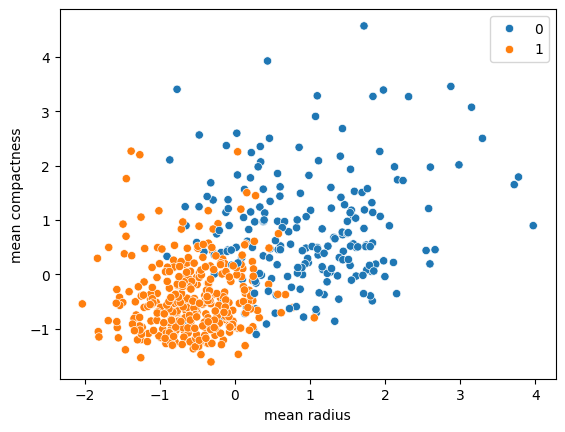

In [11]:
sns.scatterplot(x = final_df['mean radius'],y = final_df['mean compactness'], hue = bc.target)